# Clustering K-Means

In [1]:
!pip install matplotlib seaborn sklearn

In [2]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/train/merged_train.csv", sep=';' , decimal='.')
mt_cl, id_and_target = df.drop(['good_bad_flag','customerid'],axis=1), df[['good_bad_flag','customerid']]
mt_cl.head()

,edad,loannumber,loanamount,totaldue,termdays,referredby,times_loaned,times_late,times_referred,bank_account_type_Current,...,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_UNKNOWN,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_UNKNOWN
0,48,2,10000.0,13000.0,30,1,1.0,0.0,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,36,2,10000.0,13000.0,30,0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,35,4,10000.0,13000.0,30,0,3.0,2.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,30,2,10000.0,11500.0,15,0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,31,6,20000.0,24500.0,30,0,5.0,2.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
mt_cl.shape

(3277, 77)

## Elbow method para determinar nº de clusters

In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(mt_cl)
    distortions.append(kmeanModel.inertia_)

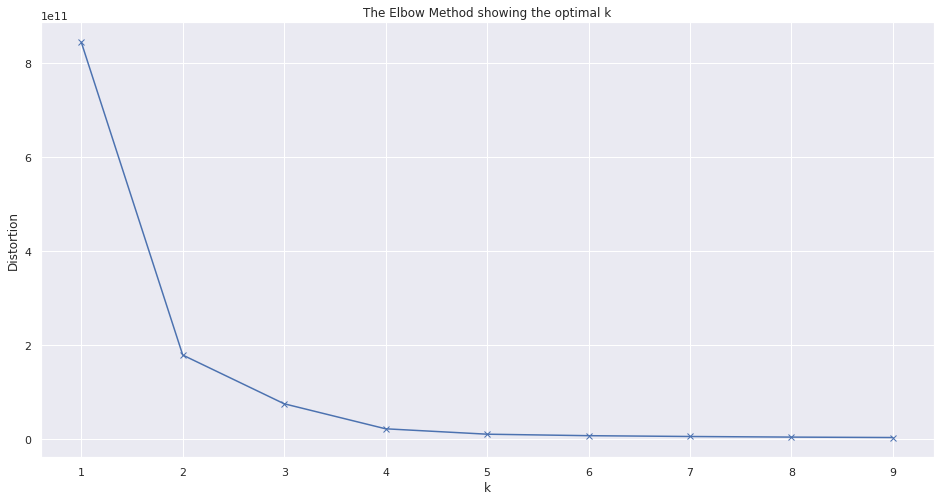

In [6]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Aplicando método de k-means

In [7]:
clustering =  KMeans(n_clusters = 2, max_iter = 300)#Crea el modelo
clustering.fit(mt_cl)

KMeans(n_clusters=2)

## Agregando la clasificación al archivo original

In [8]:
df['Kmeans_Cluster']=clustering.labels_
df.head()

,customerid,edad,loannumber,loanamount,totaldue,termdays,referredby,good_bad_flag,times_loaned,times_late,...,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_UNKNOWN,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_UNKNOWN,Kmeans_Cluster
0,8a858e135cb22031015cbafc76964ebd,48,2,10000.0,13000.0,30,1,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,1
1,8a858e275c7ea5ec015c82482d7c3996,36,2,10000.0,13000.0,30,0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,1
2,8a858e5b5bd99460015bdc95cd485634,35,4,10000.0,13000.0,30,0,1.0,3.0,2.0,...,0,0,1,0,0,0,0,0,1,1
3,8a858efd5ca70688015cabd1f1e94b55,30,2,10000.0,11500.0,15,0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,1
4,8a858ea05a859123015a8892914d15b7,31,6,20000.0,24500.0,30,0,1.0,5.0,2.0,...,0,0,0,0,0,0,0,0,1,1


In [9]:
df.to_csv("cluster_train.csv",sep=';',index=False)

## Visualización de clusters


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_mt_cl = pca.fit_transform(mt_cl)
pca_mt_cl_df = pd.DataFrame(data=pca_mt_cl, columns = ['Componente_1', 'Componente_2'])
pca_nombres_mt = pd.concat([pca_mt_cl_df, df[['Kmeans_Cluster']]], axis=1)

pca_nombres_mt

,Componente_1,Componente_2,Kmeans_Cluster
0,-11393.104845,-281.264947,1
1,-11393.104857,-281.262446,1
2,-11393.104058,-281.258982,1
3,-12508.086799,722.236030,1
4,3844.433702,-540.822097,1
...,...,...,...
3272,-12508.086419,722.235631,1
3273,-12508.086386,722.236415,1
3274,31717.900028,1281.237399,0
3275,3844.434193,-540.821299,1


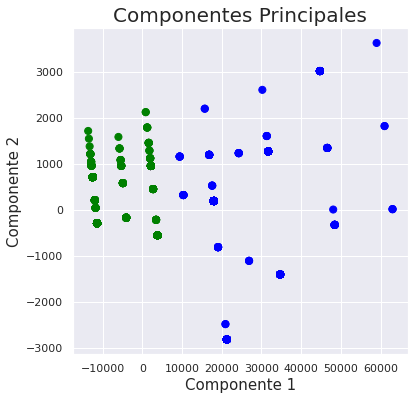

In [11]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_mt.Componente_1, y = pca_nombres_mt.Componente_2,
          c=color_theme[pca_nombres_mt.Kmeans_Cluster], s = 50)
plt.show()


## Añadimos clústers en el dataset de test

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/test/merged_test.csv",sep=';')
test, id_column = df.drop(['customerid'],axis=1), df['customerid']
res = clustering.predict(test)
test['customerid'], test['Kmeans_Cluster'] = id_column, res
test.head()

,edad,loannumber,loanamount,totaldue,termdays,referredby,times_loaned,times_late,times_referred,bank_account_type_Current,...,employment_status_clients_Student,employment_status_clients_UNKNOWN,employment_status_clients_Unemployed,level_of_education_clients_Graduate,level_of_education_clients_Post-Graduate,level_of_education_clients_Primary,level_of_education_clients_Secondary,level_of_education_clients_UNKNOWN,customerid,Kmeans_Cluster
0,45,2,10000.0,11500.0,15,0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,8a858f305c8dd672015c93b1db645db4,1
1,40,14,40000.0,44000.0,30,0,13.0,5.0,0.0,0,...,0,0,0,0,0,0,0,1,8a858fde56eb02280156eb6dafc128ac,0
2,33,8,20000.0,24500.0,30,0,7.0,5.0,0.0,0,...,0,0,0,0,1,0,0,0,8a858e695775665c015779a1a5cc1192,1
3,43,3,10000.0,11500.0,15,0,2.0,2.0,0.0,0,...,0,1,0,0,0,0,0,1,8a858fcf5b39c3ba015b3d9f215c3922,1
4,34,2,10000.0,13000.0,30,1,1.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,8a858edc5ceea2e6015ceea77c5c0300,1


In [13]:
test.to_csv("cluster_test.csv",sep=';',index=False)